In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from scipy import io
import math
import sys
basedir   = "/home/daniel/UNTDF/SistemasComplejos/Bioimpedancia/EITdF"
sourcedir = basedir+'/source'
sys.path.append(sourcedir)
import GREITdF
import EITools
import matplotlib.cm as cm

envi = GREITdF.EnvironOpt(basedir)

datitos = GREITdF.EITdata(envi,"simuresp_feb2021.mat")
datitos.get_normalized_dataframes(2)
recmodel  = GREITdF.ReconstructionModel("recmodel_male16el_maxelementsize6_uncorrelatednoise",1,envi)
estaimagen = GREITdF.RawImage(recmodel,datitos)

def showtime(FrameNr, HyperScale):
    HyperFraction = 1.1**HyperScale
    print("Hyperparameter = ",HyperFraction," * w0")
    recmodel.set_hyperparameter(HyperFraction)
    estaimagen.CalcRawImage(estaimagen.GetRefFrame())
    vmin  = estaimagen.RawImage.min()
    vmax  = estaimagen.RawImage.max()
    frame = estaimagen.RawImage[:,FrameNr]
    EITools.show_gridimage_frame(frame, recmodel, vmin, vmax)

FrameNr    = widgets.IntSlider(value=0,  min=0,   max=48, description='FRAME')
HyperScale = widgets.IntSlider(value=33, min=-20, max=60, description='hyperscale')

out = widgets.interactive_output(showtime, {'FrameNr': FrameNr, 'HyperScale': HyperScale})

widgets.HBox([widgets.VBox([FrameNr, HyperScale]), out])

In [2]:
sdim = EITools.get_sd_image(estaimagen.RawImage, 5, 15, 0.25)

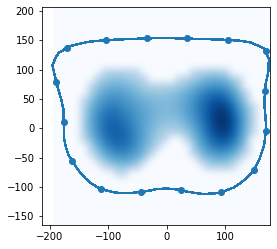

In [3]:
EITools.show_gridimage_frame(sdim, recmodel, 0, sdim.max(), True)